In [1]:
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import Element, dump, ElementTree
import datetime
import pandas as pd
import numpy as np
import random
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
import folium
from folium import plugins
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=15)
!pip install folium
!pip install selenium
!pip install pyvirtualdisplay
!apt install chromium-chromedriver
!apt install firefox

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
     |████████████████████████████████| 958 kB 8.4 MB/s 
     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  chromium-browser chromium-browser-l10n chromium-codecs-ffmpeg-extra
Suggested packages:
  webaccounts-chromium-extension unity-chromium-extension
The following NEW packages will be installed:
  chromium-browser chromium-browser-l10n chromium-chromedriver
  chromium-codecs-ffmpeg-extra
0 upgraded, 4 newly installed, 0 to remove and 39 not upgraded.
Need to get 94.0 MB of archives.
After this operation, 324 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-codecs-ffmpeg-extra amd64 95.0.4638.69-0ubuntu0.18.04.1 [1,135 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser amd64 95.0.4638.69-0ubuntu0.18.04.1 [83.6 MB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 chromium-browser-l10n all 95.0.4638.69-0ubuntu0.18.0

In [11]:
## 크롤링

def indent(elem, level=0): #자료 출처 https://goo.gl/J8VoDK
    i = "\n" + level*"  "
    if len(elem):
        if not elem.text or not elem.text.strip():
            elem.text = i + "  "
        if not elem.tail or not elem.tail.strip():
            elem.tail = i
        for elem in elem:
            indent(elem, level+1)
        if not elem.tail or not elem.tail.strip():
            elem.tail = i
    else:
        if level and (not elem.tail or not elem.tail.strip()):
            elem.tail = i
url = 'http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson'
queryParams = '?' + urlencode({ quote_plus('ServiceKey') : 'njpwJ0nJHRlmESIMvVKGm0cZCeyGQIIlsnDFVmL7l45Dgou9K63/9Mj57Mecoc1iBecj7X191/vhHJNPbvAA+w==', quote_plus('pageNo') : '1', quote_plus('numOfRows') : '10', quote_plus('startCreateDt') : '20200415', quote_plus('endCreateDt') : '20211020' })
standard_start = datetime.datetime(2020, 4, 16)
standard_end = datetime.datetime(2021,10,20)
print(url + queryParams)
request = Request(url + queryParams)
request.get_method = lambda: 'GET'
response_body = urlopen(request).read().decode('utf-8')
f = open('/content/sample_data/corona.xml', 'w', encoding='utf-8')
response_body = str(response_body)[153:-91]
f.write(response_body)
f.close()
xml = response_body
response_body


Output hidden; open in https://colab.research.google.com to view.

In [4]:
doc = ET.parse('/content/sample_data/corona.xml')
root = doc.getroot()
# root = doc.getroot()
day = standard_start
df = pd.DataFrame([(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)], columns=['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', 
                                                                                  '울산', '대전', '광주', '인천', '대구', '부산', '서울'])
total = pd.DataFrame([], columns=['합계'])

i=0

while day != standard_end:
    result = 0
    datalist = [0] * 17
    day = day + datetime.timedelta(days=1)
    for data in root.findall("item"):
        if(data.findtext('stdDay') == day.strftime('%Y년 %m월 %d일 00시') and (data.findtext('gubun') != '검역' and data.findtext('gubun') != '합계') ):

            result += int(data.findtext('incDec'))
            
            if data.findtext('gubun') == '제주':
                datalist[0] = int(data.findtext('incDec')) / 6
            elif data.findtext('gubun') == '경남':
                datalist[1] = int(data.findtext('incDec')) / 33
            elif data.findtext('gubun') == '경북':
                datalist[2] = int(data.findtext('incDec')) / 26
            elif data.findtext('gubun') == '전남':
                datalist[3] = int(data.findtext('incDec')) / 17
            elif data.findtext('gubun') == '전북':
                datalist[4] = int(data.findtext('incDec')) / 17
            elif data.findtext('gubun') == '충남':
                datalist[5] = int(data.findtext('incDec')) / 22
            elif data.findtext('gubun') == '충북':
                datalist[6] = int(data.findtext('incDec')) / 16
            elif data.findtext('gubun') == '강원':
                datalist[7] = int(data.findtext('incDec')) / 15
            elif data.findtext('gubun') == '경기':
                datalist[8] = int(data.findtext('incDec')) / 134
            elif data.findtext('gubun') == '세종':
                datalist[9] = int(data.findtext('incDec')) / 3
            elif data.findtext('gubun') == '울산':
                datalist[10] = int(data.findtext('incDec')) / 11
            elif data.findtext('gubun') == '대전':
                datalist[11] = int(data.findtext('incDec')) / 15
            elif data.findtext('gubun') == '광주':
                datalist[12] = int(data.findtext('incDec')) / 14
            elif data.findtext('gubun') == '인천':
                datalist[13] = int(data.findtext('incDec')) / 29
            elif data.findtext('gubun') == '대구':
                datalist[14] = int(data.findtext('incDec')) / 24
            elif data.findtext('gubun') == '부산':
                datalist[15] = int(data.findtext('incDec')) / 33
            elif data.findtext('gubun') == '서울':
                datalist[16] = int(data.findtext('incDec')) / 96

            
    if(len(datalist) != 0):
        df.loc[day.strftime('%y%m%d')] = datalist
    total.loc[day.strftime('%y%m%d')] = result
    i+=1

df

total


,합계
200416,18
200417,11
200418,14
200419,6
200420,9
...,...
211016,1611
211017,1412
211018,1050
211019,1068


In [5]:
#!pip uninstall folium
!pip install folium

     |████████████████████████████████| 127 kB 8.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
selenium 4.1.0 requires urllib3[secure]~=1.26, but you have urllib3 1.25.11 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
from folium.plugins import HeatMap
from datetime import timedelta
import io
from PIL import Image

# 히트맵

start_date = standard_start
stop_date = standard_end


location = pd.Series([[33.3773337651379, 126.55266103537416], [35.4622116045052, 128.21344042875717], [36.2919027483021, 128.89868202343354], [34.867572323221744, 126.98829933917756],
                      [35.72039395691089, 127.15560019966733], [36.719554763005064, 126.799557792879], [37.002043478253825, 127.7000426568058], [37.827115818082305, 128.15206503776542], 
                      [37.417624054232334, 127.52502141957336], [36.561439839079895, 127.25851386207097], [35.54777775611066, 129.25608274990222], [36.340544304864125, 127.39309803603769], 
                      [35.155422353003495, 126.83465969547665], [37.454387626648895, 126.70486355666984], [35.82905529216811, 128.56334455573804], [35.161543211871475, 129.04643171034576], [37.552330173384895, 126.99322524634424]],
                   index=['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', '울산', '대전', '광주', '인천', '대구', '부산', '서울'])

while start_date < stop_date:
    latlon = list()
    m = folium.Map(
        location = [36.5053542, 127.7043419],
        zoom_start = 6,
        tiles = 'Cartodb Positron'
    )

    data = df.loc[start_date.strftime('%y%m%d')];


    for i in range(17):
        for j in range(int(data[i]) * 10):
        
            latlon.append([location[data.index[i]][0] + random.randrange(-2,2) / 10000, location[data.index[i]][1] + random.randrange(-2,2) / 10000])


    heatMap = HeatMap(latlon,
                   min_opacity=1,
                   radius=25, blur=30,
                   max_zoom=5
                  )

    m.add_child(heatMap)
    m.save("/mnt/" + str(start_date.year) + str(start_date.month) + str(start_date.day) + ".html")
    dates = start_date.strftime("%y%m%d")
    print(dates)
    start_date += timedelta(days=1)

KeyError: ignored

In [12]:
from folium.plugins import HeatMap
from datetime import timedelta
import io
from PIL import Image

# 원으로

start_date = standard_start
stop_date = standard_end



location = pd.Series([[33.3773337651379, 126.55266103537416], [35.4622116045052, 128.21344042875717], [36.2919027483021, 128.89868202343354], [34.867572323221744, 126.98829933917756],
                      [35.72039395691089, 127.15560019966733], [36.719554763005064, 126.799557792879], [37.002043478253825, 127.7000426568058], [37.827115818082305, 128.15206503776542], 
                      [37.417624054232334, 127.52502141957336], [36.561439839079895, 127.25851386207097], [35.54777775611066, 129.25608274990222], [36.340544304864125, 127.39309803603769], 
                      [35.155422353003495, 126.83465969547665], [37.454387626648895, 126.70486355666984], [35.82905529216811, 128.56334455573804], [35.161543211871475, 129.04643171034576], [37.552330173384895, 126.99322524634424]],
                   index=['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', '울산', '대전', '광주', '인천', '대구', '부산', '서울'])

while start_date < stop_date:
    latlon = list()
    m = folium.Map(
        location = [36.5053542, 127.7043419],
        zoom_start = 7,
        tiles = 'Cartodb Positron'
    )

    data = df.loc[start_date.strftime('%y%m%d')];
    

    for i in range(17):
        value = int(data[i])
        if(value <= 0.1):
            continue;
        if(value >= 8):
            fill_color='#330000'
        elif(value >=6):
            fill_color='#FF0000'
        elif(value >= 4):
            fill_color='#CCFF33'
        elif(value >= 2):
            fill_color='#00FF00'
        else:
            fill_color='#3300FF'
        folium.CircleMarker(
            location = [location[data.index[i]][0], location[data.index[i]][1]],
            radius = value * 10,
            fill_color=fill_color,
            stroke=False
        
        ).add_to(m)

    m.save("/mnt/" + str(start_date.year) + str(start_date.month) + str(start_date.day) + ".html")
    dates = start_date.strftime("%y%m%d")
    print(dates)
    start_date += timedelta(days=1)

200416
200417
200418
200419
200420
200421
200422
200423
200424
200425
200426
200427
200428
200429
200430
200501
200502
200503
200504
200505
200506
200507
200508
200509
200510
200511
200512
200513
200514
200515
200516
200517
200518
200519
200520
200521
200522
200523
200524
200525
200526
200527
200528
200529
200530
200531
200601
200602
200603
200604
200605
200606
200607
200608
200609
200610
200611
200612
200613
200614
200615
200616
200617
200618
200619
200620
200621
200622
200623
200624
200625
200626
200627
200628
200629
200630
200701
200702
200703
200704
200705
200706
200707
200708
200709
200710
200711
200712
200713
200714
200715
200716
200717
200718
200719
200720
200721
200722
200723
200724
200725
200726
200727
200728
200729
200730
200731
200801
200802
200803
200804
200805
200806
200807
200808
200809
200810
200811
200812
200813
200814
200815
200816
200817
200818
200819
200820
200821
200822
200823
200824
200825
200826
200827
200828
200829
200830
200831
200901
200902
200903
200904
200905

In [14]:
from pyvirtualdisplay import Display
from selenium import webdriver
import folium
import time
from PIL import Image, ImageFont, ImageDraw

start_date = standard_start
stop_date = standard_end

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=chrome_options)

font = font = ImageFont.truetype("/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf", 20)

while start_date < stop_date:

    fn = str(start_date.year) + str(start_date.month) + str(start_date.day)

    driver.get("file:///mnt/" + fn + ".html")
    driver.maximize_window()
    driver.set_window_size(500, 800)
#Give the map tiles some time to load
    # time.sleep(1)
    element_name = str(start_date.year) + "-" + str(start_date.month) + "-" + str(start_date.day)
    file_name = "/images/" + element_name + ".png";
    
    driver.save_screenshot(file_name)
    img = Image.open(file_name)
    draw = ImageDraw.Draw(img) # 이미지에 글자쓰기
    draw.text((400,10), element_name, (0,0,0), font) # x=0, y=10, (0,0,0) : 검은색(RGB값)
    draw = ImageDraw.Draw(img)
    img.save(file_name)
    dates = start_date.strftime("%y%m%d")
    print(dates)
    start_date += timedelta(days=1)

200416
200417
200418
200419
200420
200421
200422
200423
200424
200425
200426
200427
200428
200429
200430
200501
200502
200503
200504
200505
200506
200507
200508
200509
200510
200511
200512
200513
200514
200515
200516
200517
200518
200519
200520
200521
200522
200523
200524
200525
200526
200527
200528
200529
200530
200531
200601
200602
200603
200604
200605
200606
200607
200608
200609
200610
200611
200612
200613
200614
200615
200616
200617
200618
200619
200620
200621
200622
200623
200624
200625
200626
200627
200628
200629
200630
200701
200702
200703
200704
200705
200706
200707
200708
200709
200710
200711
200712
200713
200714
200715
200716
200717
200718
200719
200720
200721
200722
200723
200724
200725
200726
200727
200728
200729
200730
200731
200801
200802
200803
200804
200805
200806
200807
200808
200809
200810
200811
200812
200813
200814
200815
200816
200817
200818
200819
200820
200821
200822
200823
200824
200825
200826
200827
200828
200829
200830
200831
200901
200902
200903
200904
200905

In [15]:
import imageio
import os

start_date = standard_start
stop_date = standard_end

directory = r'/images'      # 사진 디렉토리
file_type = r'png'               # 사진 확장자
save_gif_name = r'Corona-Final'     # 완성 gif 이름
speed_sec = { 'duration': .0166 }   # 사진 넘기는 시간(초)

images = []
i = 0
while start_date < stop_date:

    file_name = str(start_date.year) + "-" + str(start_date.month) + "-" + str(start_date.day) + ".png"
    
    print(file_name + "-" + str(i))
    i+=1
    if file_name.endswith('.{}'.format(file_type)):
        file_path = os.path.join(directory, file_name)
        images.append(imageio.imread(file_path))
    start_date += timedelta(days=1)
imageio.mimsave('{}/{}.gif'.format(directory, save_gif_name), images, **speed_sec)

# for file_name in os.listdir(directory):
#     print(file_name)
#     if file_name.endswith('.{}'.format(file_type)):
#         file_path = os.path.join(directory, file_name)
#         images.append(imageio.imread(file_path))
# imageio.mimsave('{}/{}.gif'.format(directory, save_gif_name), images, **speed_sec)

2020-4-16.png-0
2020-4-17.png-1
2020-4-18.png-2
2020-4-19.png-3
2020-4-20.png-4
2020-4-21.png-5
2020-4-22.png-6
2020-4-23.png-7
2020-4-24.png-8
2020-4-25.png-9
2020-4-26.png-10
2020-4-27.png-11
2020-4-28.png-12
2020-4-29.png-13
2020-4-30.png-14
2020-5-1.png-15
2020-5-2.png-16
2020-5-3.png-17
2020-5-4.png-18
2020-5-5.png-19
2020-5-6.png-20
2020-5-7.png-21
2020-5-8.png-22
2020-5-9.png-23
2020-5-10.png-24
2020-5-11.png-25
2020-5-12.png-26
2020-5-13.png-27
2020-5-14.png-28
2020-5-15.png-29
2020-5-16.png-30
2020-5-17.png-31
2020-5-18.png-32
2020-5-19.png-33
2020-5-20.png-34
2020-5-21.png-35
2020-5-22.png-36
2020-5-23.png-37
2020-5-24.png-38
2020-5-25.png-39
2020-5-26.png-40
2020-5-27.png-41
2020-5-28.png-42
2020-5-29.png-43
2020-5-30.png-44
2020-5-31.png-45
2020-6-1.png-46
2020-6-2.png-47
2020-6-3.png-48
2020-6-4.png-49
2020-6-5.png-50
2020-6-6.png-51
2020-6-7.png-52
2020-6-8.png-53
2020-6-9.png-54
2020-6-10.png-55
2020-6-11.png-56
2020-6-12.png-57
2020-6-13.png-58
2020-6-14.png-59
2020-6-1

In [ ]:
from folium.plugins import HeatMap
import datetime
from folium.plugins import HeatMapWithTime

def date_range(start, end):
    start = standard_start.strptime(start, "%Y%m%d")
    end = standard_end.strptime(end, "%Y%m%d")
    dates = [(start + timedelta(days=i)).strftime("%y%m%d") for i in range((end-start).days+1)]
    return dates

latlon = [list()]
latlon.pop(0)
m = folium.Map(
    location = [36.5053542, 127.7043419],
    zoom_start = 5,
    tiles = 'Cartodb Positron'
)

total_date = date_range("20210102", "20210211")
error_date = list()

view_data = pd.DataFrame([(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)], columns=['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', '울산', '대전', '광주', '인천', '대구', '부산', '서울'])

for d in range(len(total_date)):
    # y = int(total_date[d][0] + total_date[d][1])
    # mm = int(total_date[d][2] + total_date[d][3])
    # d = int(total_date[d][4] + total_date[d][5])
    


    location = pd.Series([[33.3773337651379, 126.55266103537416], [35.4622116045052, 128.21344042875717], [36.2919027483021, 128.89868202343354], [34.867572323221744, 126.98829933917756],
                      [35.72039395691089, 127.15560019966733], [36.719554763005064, 126.799557792879], [37.002043478253825, 127.7000426568058], [37.827115818082305, 128.15206503776542], 
                      [37.417624054232334, 127.52502141957336], [36.561439839079895, 127.25851386207097], [35.54777775611066, 129.25608274990222], [36.340544304864125, 127.39309803603769], 
                      [35.155422353003495, 126.83465969547665], [37.454387626648895, 126.70486355666984], [35.82905529216811, 128.56334455573804], [35.161543211871475, 129.04643171034576], [37.552330173384895, 126.99322524634424]],
                   index=['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', '울산', '대전', '광주', '인천', '대구', '부산', '서울'])
    try:
        data = df.loc[total_date[d]];
    

        each_data = list()

        for i in range(17):
            for j in range(int(data[i]) * 10):
                each_data.append([location[data.index[i]][0] + random.randrange(-2,2) / 10000, location[data.index[i]][1] + random.randrange(-2,2) / 10000])
        latlon.append(each_data)

    except:
        error_date.append(total_date[d])
        pass

# heatMap = HeatMap(latlon,
#                    min_opacity=1,
#                    radius=20, blur=30,
#                    max_zoom=5, color='red'
#                   )

for i in range(len(error_date)):
    total_date.remove(error_date[i])

print(error_date)

HeatMapWithTime(latlon, index = total_date, min_opacity=1,
                        radius=37).add_to(m)

HeatMap(latlon).add_to(m)
m.save('map.html')
m
m.add_child(heatMap)
m

In [ ]:
data

제주     10
경남     33
경북     11
전남      4
전북      2
충남      7
충북     24
강원     16
경기    180
세종      3
울산      7
대전     22
광주      4
인천     22
대구     30
부산     15
서울    213
Name: 210610, dtype: object

In [16]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript g

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
fontprop = fm.FontProperties(fname=path, size=15)

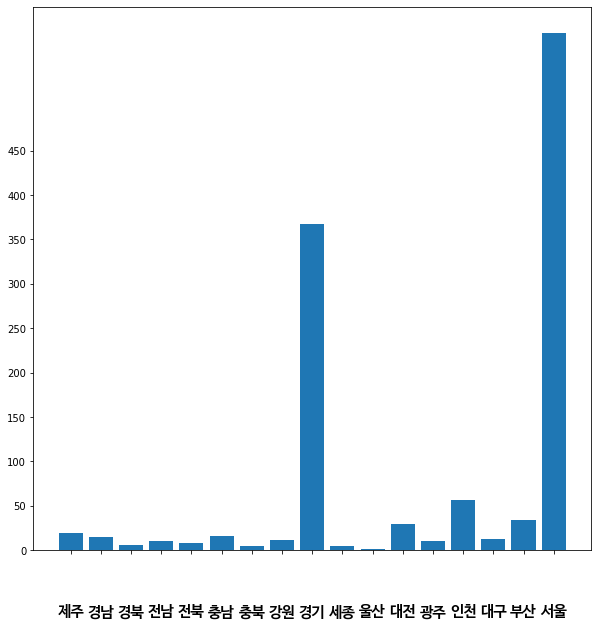

In [ ]:
index=['제주', '경남', '경북', '전남', '전북', '충남', '충북', '강원', '경기', '세종', '울산', '대전', '광주', '인천', '대구', '부산', '서울']
day = datetime.datetime(21, 7, 7)
data = df.loc[day.strftime('%y%m%d')];
x = np.arange(17)
plt.rc('font', family='Malgun Gothic')
plt.bar(x, data.astype(int))
plt.tick_params(axis='x', pad=50)
plt.xticks(x, index, fontproperties=fontprop)
plt.yticks(np.arange(0, 500, 50))
plt.rcParams["figure.figsize"] = (10, 10)
plt.show()

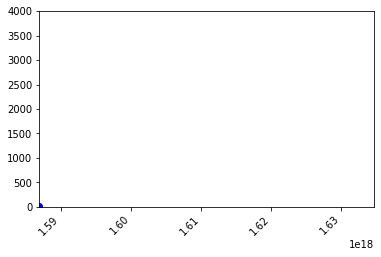

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

start = pd.Timestamp('2020-04-16')
end = pd.Timestamp('2021-10-20')

fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.set_xlim(start.value, end.value)
ax.set_ylim(0, 4000)

x, y = [], []
line, = plt.plot([], [], 'bo')


def update(frame):
    x.append(frame)
    y.append(total.loc[pd.to_datetime(frame).strftime('%y%m%d')])
    line.set_data(x, y)
    return line,


ani = FuncAnimation(fig, update, frames=np.linspace(start.value, end.value, total.size))
plt.xticks(rotation=45)
plt.show()

ani.save('/images/corona.mp4')

TypeError: ignored

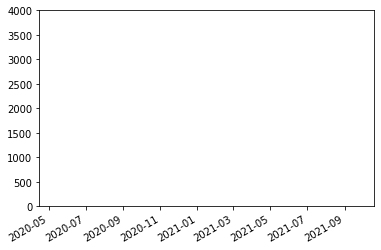

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

start_date = standard_start
stop_date = standard_end

fig, ax = plt.subplots()
fig.autofmt_xdate()
ax.set_xlim([start_date, stop_date])
ax.set_ylim(0, 4000)

x, y = [], []
line, = plt.plot([], [], 'bo')


def update(frame):
    x.append(frame)
    y.append(total.loc[start_date.strftime('%y%m%d')])
    line.set_data(x, y)
    return line,

ani = FuncAnimation(fig, update, frames=np.linspace(start_date, stop_date, total.size))
plt.xticks(rotation=45)
plt.show()

ani.save('corona.mp4', writer='pillow', fps=60)